In [86]:
import retro
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
import time
import scipy.misc

env = None

In [87]:
if env is None:
    env = retro.make(game='SonicTheHedgehog2-Genesis', state='EmeraldHillZone.Act1')
_ = env.reset()

env.render()

frame, reward, done, info = env.step( env.action_space.sample() )

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


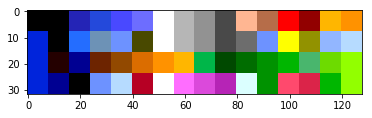

In [88]:
palate_image = scipy.misc.imread( 'data/sonic2/palate.png', mode='RGBA' )
plt.imshow( palate_image )

[[  0   0   0]
 [  0   0 136]
 [  0  32 200]
 [  0 100   0]
 [  0 136   0]
 [  0 168   0]
 [ 32   0   0]
 [ 32  32 168]
 [ 32  68 200]
 [ 32 100 232]
 [ 64  68   0]
 [ 64  68  64]
 [ 64  68 232]
 [ 96  32   0]
 [ 96 100 232]
 [ 96 136 168]
 [ 96 136 232]
 [ 96 204   0]
 [136   0   0]
 [136  68   0]
 [136 136   0]
 [136 136 136]
 [136 168 232]
 [136 236   0]
 [168  32 168]
 [168 100  64]
 [168 168 168]
 [168 204 232]
 [200  68 200]
 [200 100   0]
 [200 236 232]
 [232   0   0]
 [232 100 232]
 [232 136   0]
 [232 168   0]
 [232 168 136]
 [232 236   0]
 [232 236 232]]
(224, 320)


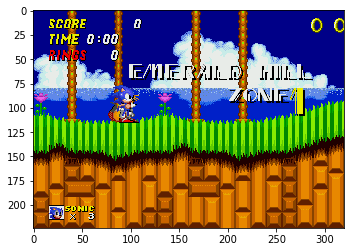

In [89]:
flat_frame = frame.copy()
palate, flat_frame = np.unique(flat_frame.reshape(-1, flat_frame.shape[2]), axis=0, return_inverse=True)

flat_frame = flat_frame.reshape( frame.shape[ :-1 ] )

print( palate )

print( flat_frame.shape )

plt.imshow( frame )
# plt.imshow( palate[ None ] )

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


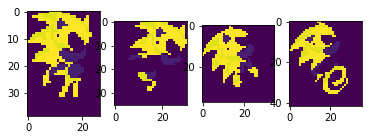

In [90]:
sonics = []
sonics_raw = []
sonic_dir = 'data/sonic2/sonic'
for file in os.listdir( sonic_dir ):
    sonic_dir_file = os.path.join( sonic_dir, file )
    
    sonic = scipy.misc.imread( sonic_dir_file, mode='RGBA' )
    sonics_raw.append( sonic.copy() )
    sonic = cv.cvtColor( sonic, cv.COLOR_RGB2HSV )[ :, :, 0 ]

    sonics.append( sonic )

# test

# sonic_standing_1_palate, _ = np.unique(sonic_standing_1.reshape(-1, sonic_standing_1.shape[2]), axis=0, return_inverse=True)
# print( sonic_standing_1_palate )

# sonic = sonic_standing_1
# sonic_flat = sonic.reshape( -1, sonic.shape[ 2 ] )
# print( sonic_flat )
# pixel = sonic_flat[ -1 ]
# matches = palate == pixel[ 0 : 3 ]

# print( pixel )
# print( palate )
# print( matches )


# test
    
    
    
plt.subplot(1, 4, 1)
plt.imshow( sonics[ 165 ] )
plt.subplot(1, 4, 2)
plt.imshow( sonics[ 1 ] )
plt.subplot(1, 4, 3)
plt.imshow( sonics[ 2 ] )
plt.subplot(1, 4, 4)
plt.imshow( sonics[ 3 ] )

1.8214037418365479


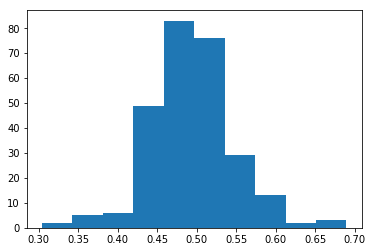

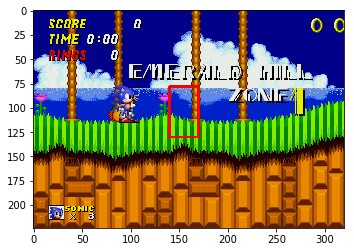

In [91]:
def findInFrame( template, frame_alpha ):
    w, h = template.shape[ 0:2 ]
    results = cv.matchTemplate( frame_alpha, template, cv.TM_CCOEFF_NORMED )

    _, score, _, max_loc = cv.minMaxLoc( results )
    return score, ( max_loc[ 0 ], max_loc[ 1 ] ), ( max_loc[ 0 ] + h, max_loc[ 1 ] + w  )

scores = []
all_sprite_results = []

frame_alpha = np.dstack( ( frame, np.full( frame.shape[ 0:2 ], 255 ) ) )
frame_alpha = frame_alpha.astype( np.uint8 )
frame_alpha = cv.cvtColor( frame_alpha, cv.COLOR_RGB2HSV )[ :, :, 0 ]

start_time = time.time()
for sonic in sonics:
    score, tl, br = findInFrame( sonic, frame_alpha )
    all_sprite_results.append( ( score, tl, br ) )
    scores.append( score )
print( time.time() - start_time )
    
highest_score = np.max( scores )
highest_score_idx = np.argmax( scores )

plt.hist( scores )
plt.subplots()

score, tl, br = all_sprite_results[ highest_score_idx ]

cv.rectangle( frame, tl, br, 255, 2 )
plt.imshow( frame )

0.6897240877151489 196


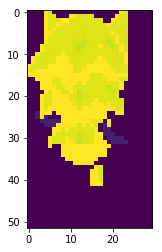

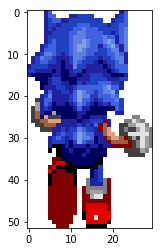

In [92]:
plt.imshow( sonics[ highest_score_idx ] )
plt.subplots()
plt.imshow( sonics_raw[ highest_score_idx ] )
print( highest_score, highest_score_idx )
